# **SUBMISSION**
***Proyek Akhir : Sistem Rekomendasi***


---


Nama : Alfi Safira Az Zahrah

Kelas : Pengembang Machine Learning & Front-End Web

Kelompok : M-06

E-mail : alfisafira69@gmail.com

---

**Project Overview**

Pada Proyek Akhir dengan studi kasus _Sistem Rekomendasi_ ini, penulis membuat model sistem untuk memberikan rekomendasi Judul Buku dengan menggunakan pendekatan _Content-Based Filtering_ dan _Collaborative Filtering_. 

**Dataset**

Dataset yang digunakan yakni [Book Recommendation Dataset](https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset) dari Kaggle.com

## **Import Library yang Dibutuhkan**

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# model development content-based filtering
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

## **Loading Data**

In [2]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# install paket kaggle
!pip install -q kaggle

# Upload file kaggle.json dari Create New API Token Akun Kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"alfisafira","key":"dce233816e86f0a03dc21498a1b50490"}'}

In [4]:
import opendatasets as od

dataset_url= 'https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset'
od.download('https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset')

100%|██████████| 23.8M/23.8M [00:00<00:00, 55.7MB/s]


In [5]:
# read dataset

books = pd.read_csv('/content/book-recommendation-dataset/Books.csv')
ratings = pd.read_csv('/content/book-recommendation-dataset/Ratings.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
# melihat ukuran masing2 dataframe
print(books.shape)
print(ratings.shape)

(271360, 8)
(1149780, 3)


Berdasarkan output di atas dapat terlihat bahwa :
* Pada dataframe books terdapat 271360 baris dan 8 kolom variabel
* Pada dataframe ratings terdapat 1149780 baris dan 3 kolom variabel

## **Exploratory Data Analysis (EDA)**


---



### **Deskripsi Variabel**

Berikut ini deskripsi variabel-variabel yang terdapat pada dataframe **Books.csv**:
* ISBN : Nomor Buku Standar Internasional (_International Standard Book Number_)
* Book-Title : Judul buku
* Book-Author : Penulis buku
* Year-Of-Publication : Tahun buku dipublikasikan/diterbitkan
* Publisher : Penerbit buku
* Image-URL-S : Tautan gambar sampul buku berukuran kecil (_Small_)
* Image-URL-M : Tautan gambar sampul buku berukuran sedang (_Medium_)
* Image-URL-L : Tautan gambar sampul buku berukuran besar (_Large_)

Berikut ini deskripsi variabel-variabel yang terdapat pada dataframe **Ratings.csv**:
* User-ID : ID pengguna
* ISBN : Nomor Buku Standar Internasional (_International Standard Book Number_)
* Book-Rating : Rating buku menurut pengguna

### **Univariate Data Analysis**

1. Books

In [7]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


Berdasarkan output di atas, terlihat bahwa dataframe books memiliki 271360 data entri dan terdapat 8 variabel.

Untuk melihat ada berapa banyak entri yang unik dari masing-masing variabel (disini kita akan mengecek hanya beberapa variabel saja) jalankan kode berikut. Namun sebelum itu, rename header kolom terlebih dahulu.

In [8]:
# rename header kolom
books = books.rename(columns={'Book-Title': 'book_title','Book-Author':'book_author',
                              'Year-Of-Publication':'year_of_publication','Image-URL-S':'Image_URL_S',
                              'Image-URL-M':'Image_URL_M','Image-URL-L':'Image_URL_L'})
books.head(3)

,ISBN,book_title,book_author,year_of_publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...


In [9]:
# mengecek entri unik dr variabel Book-Title
print('Banyak Data : ', len(books.book_title.unique()))
print('Judul Buku : ', books.book_title.unique())

Banyak Data :  242135
Judul Buku :  ['Classical Mythology' 'Clara Callan' 'Decision in Normandy' ...
 'Lily Dale : The True Story of the Town that Talks to the Dead'
 "Republic (World's Classics)"
 "A Guided Tour of Rene Descartes' Meditations on First Philosophy with Complete Translations of the Meditations by Ronald Rubin"]


Dari output di atas dapat berarti terdapat 242135 data judul buku yang berbeda (unique).

In [10]:
# mengecek entri unik dr variabel Book-Author
print('Banyak Data : ', len(books.book_author.unique()))
print('Nama Penulis : ', books.book_author.unique())

Banyak Data :  102024
Nama Penulis :  ['Mark P. O. Morford' 'Richard Bruce Wright' "Carlo D'Este" ...
 'David Biggs' 'Teri Sloat' 'Christopher  Biffle']


Dari output di atas dapat berarti terdapat 102024 data nama penulis yang berbeda (unique).

In [11]:
# mengecek entri unik dr variabel Publisher
print('Banyak Data : ', len(books.Publisher.unique()))
print('Nama Penerbit : ', books.Publisher.unique())

Banyak Data :  16808
Nama Penerbit :  ['Oxford University Press' 'HarperFlamingo Canada' 'HarperPerennial' ...
 'Tempo' 'Life Works Books' 'Connaught']


Dari output di atas dapat berarti terdapat 16808 data nama penerbit yang berbeda (unique).

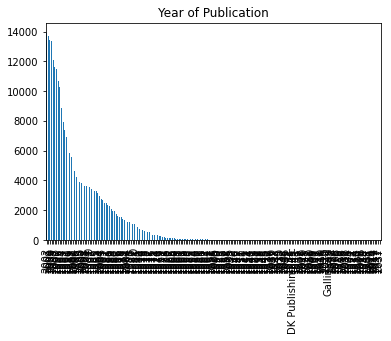

In [12]:
# melihat distribusi data variabel Year of Publication
import matplotlib.pyplot as plt
count = books["year_of_publication"].value_counts()
count.plot(kind='bar', title="Year of Publication");
 
plt.show()

Dari output di atas dapat terlihat bahwa distribusi data Year of Publication cenderung _right-skewed_.

2. Ratings

In [13]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


Berdasarkan output di atas, terlihat bahwa dataframe ratings memiliki 1149780 data entri dan terdapat 3 variabel.

Untuk melihat ada berapa banyak entri yang unik dari masing-masing variabel (User-ID dan Book-Rating) jalankan kode berikut. Namun sebelum itu, rename header kolom terlebih dahulu.

In [14]:
# rename header kolom
ratings = ratings.rename(columns={'User-ID': 'user_id','Book-Rating':'book_rating'})
ratings.head()

,user_id,ISBN,book_rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [15]:
# mengecek entri unik dr variabel User-ID
print('Banyak Data : ', len(ratings.user_id.unique()))
print('User ID : ', ratings.user_id.unique())

Banyak Data :  105283
User ID :  [276725 276726 276727 ... 276709 276721 276723]


Dari output di atas dapat berarti terdapat 105283 data user berdasarkan User ID yang berbeda (unique).

In [16]:
# mengecek entri unik dr variabel Book-Rating
print('Banyak Data : ', len(ratings.book_rating.unique()))
print('Rating Buku : ', ratings.book_rating.unique())

Banyak Data :  11
Rating Buku :  [ 0  5  3  6  8  7 10  9  4  1  2]


Dari output di atas dapat berarti terdapat 11 rating buku yang berbeda, yakni dari skala 0 - 10.

Untuk melihat distribusi data Book-Rating berikut divisualisasikan dalam bentuk plot bar

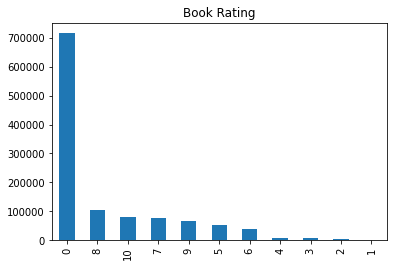

In [19]:
count = ratings["book_rating"].value_counts()
count.plot(kind='bar', title="Book Rating");
 
plt.show()

Dari visualisasi di atas dapat terlihat bahwa rating 0 paling banyak diberikan oleh user.

## **Data Pre-Processing**


---



### **Menggabungkan Data Buku dan Data Rating**

In [20]:
# Menggabungkan dataframe books dengan ratings dan memasukkannya ke dalam variabel ds
ds = pd.merge(books, ratings, on='ISBN', how='left')
ds

,ISBN,book_title,book_author,year_of_publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L,user_id,book_rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2.0,0.0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8.0,5.0
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400.0,0.0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676.0,8.0
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1032340,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,276463.0,7.0
1032341,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,276579.0,4.0
1032342,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,276680.0,0.0
1032343,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,276680.0,0.0


Melihat dari jumlah data pada dataframe yang terbilang banyak yakni `1032345` baris sampel data, maka pada proyek ini hanya akan diambil `100000` baris sampel data saja.

In [21]:
ds = ds[:100000]
ds

,ISBN,book_title,book_author,year_of_publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L,user_id,book_rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2.0,0.0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8.0,5.0
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400.0,0.0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676.0,8.0
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385.0,0.0
...,...,...,...,...,...,...,...,...,...,...
99995,0385484518,"Tuesdays with Morrie: An Old Man, a Young Man,...",MITCH ALBOM,1997,Doubleday,http://images.amazon.com/images/P/0385484518.0...,http://images.amazon.com/images/P/0385484518.0...,http://images.amazon.com/images/P/0385484518.0...,159033.0,0.0
99996,0385484518,"Tuesdays with Morrie: An Old Man, a Young Man,...",MITCH ALBOM,1997,Doubleday,http://images.amazon.com/images/P/0385484518.0...,http://images.amazon.com/images/P/0385484518.0...,http://images.amazon.com/images/P/0385484518.0...,159854.0,10.0
99997,0385484518,"Tuesdays with Morrie: An Old Man, a Young Man,...",MITCH ALBOM,1997,Doubleday,http://images.amazon.com/images/P/0385484518.0...,http://images.amazon.com/images/P/0385484518.0...,http://images.amazon.com/images/P/0385484518.0...,160368.0,0.0
99998,0385484518,"Tuesdays with Morrie: An Old Man, a Young Man,...",MITCH ALBOM,1997,Doubleday,http://images.amazon.com/images/P/0385484518.0...,http://images.amazon.com/images/P/0385484518.0...,http://images.amazon.com/images/P/0385484518.0...,160819.0,0.0


Data inilah yang akan digunakan untuk membuat sistem rekomendasi.

## **Data Preparation**


---



### **Mengecek dan Menangani Missing Value**

Setelah proses penggabungan menggunakan fungsi `merge`, mari kita cek lagi datanya, apakah ada _missing value_ atau tidak.

In [22]:
# mengecek missing value pada dataframe ds
ds.isnull().sum()

ISBN                   0
book_title             0
book_author            0
year_of_publication    0
Publisher              0
Image_URL_S            0
Image_URL_M            0
Image_URL_L            0
user_id                4
book_rating            4
dtype: int64

Dari output di atas terlihat bahwa pada variabel "user_id" dan "book_rating" terdapat 4 _missing value_. Untuk mengatasi _missing value_ kita akan menghapusnya menggunakan fungsi `dropna()`

In [23]:
# membersihkan missing value dengan fungsi dropna()
ds_clean = ds.dropna()
ds_clean

,ISBN,book_title,book_author,year_of_publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L,user_id,book_rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2.0,0.0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8.0,5.0
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400.0,0.0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676.0,8.0
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385.0,0.0
...,...,...,...,...,...,...,...,...,...,...
99995,0385484518,"Tuesdays with Morrie: An Old Man, a Young Man,...",MITCH ALBOM,1997,Doubleday,http://images.amazon.com/images/P/0385484518.0...,http://images.amazon.com/images/P/0385484518.0...,http://images.amazon.com/images/P/0385484518.0...,159033.0,0.0
99996,0385484518,"Tuesdays with Morrie: An Old Man, a Young Man,...",MITCH ALBOM,1997,Doubleday,http://images.amazon.com/images/P/0385484518.0...,http://images.amazon.com/images/P/0385484518.0...,http://images.amazon.com/images/P/0385484518.0...,159854.0,10.0
99997,0385484518,"Tuesdays with Morrie: An Old Man, a Young Man,...",MITCH ALBOM,1997,Doubleday,http://images.amazon.com/images/P/0385484518.0...,http://images.amazon.com/images/P/0385484518.0...,http://images.amazon.com/images/P/0385484518.0...,160368.0,0.0
99998,0385484518,"Tuesdays with Morrie: An Old Man, a Young Man,...",MITCH ALBOM,1997,Doubleday,http://images.amazon.com/images/P/0385484518.0...,http://images.amazon.com/images/P/0385484518.0...,http://images.amazon.com/images/P/0385484518.0...,160819.0,0.0


Setelah _missing value_ dihilangkan, kini dataframe ds_clean memiliki `99996` baris sampel data dan 10 kolom.

In [24]:
# Mengecek kembali missing value pada variabel ds_clean
ds_clean.isnull().sum()

ISBN                   0
book_title             0
book_author            0
year_of_publication    0
Publisher              0
Image_URL_S            0
Image_URL_M            0
Image_URL_L            0
user_id                0
book_rating            0
dtype: int64

### **Mengecek dan Menghapus Data Duplikat**

Dalam sistem rekomendasi yang kita kembangkan, penting untuk memastikan data satu judul buku, satu author (penulis). Tujuannya supaya tidak terjadi dobel atau rangkap.

In [25]:
# Membuat variabel preparation yang berisi dataframe ds_clean kemudian mengurutkan berdasarkan book_title
preparation = ds_clean
preparation.sort_values('book_title')

,ISBN,book_title,book_author,year_of_publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L,user_id,book_rating
36394,0307001164,101 Dalmatians,Justine Korman,1996,Golden Books Publishing Company,http://images.amazon.com/images/P/0307001164.0...,http://images.amazon.com/images/P/0307001164.0...,http://images.amazon.com/images/P/0307001164.0...,88122.0,0.0
36401,0307001164,101 Dalmatians,Justine Korman,1996,Golden Books Publishing Company,http://images.amazon.com/images/P/0307001164.0...,http://images.amazon.com/images/P/0307001164.0...,http://images.amazon.com/images/P/0307001164.0...,230522.0,0.0
36400,0307001164,101 Dalmatians,Justine Korman,1996,Golden Books Publishing Company,http://images.amazon.com/images/P/0307001164.0...,http://images.amazon.com/images/P/0307001164.0...,http://images.amazon.com/images/P/0307001164.0...,221777.0,10.0
36399,0307001164,101 Dalmatians,Justine Korman,1996,Golden Books Publishing Company,http://images.amazon.com/images/P/0307001164.0...,http://images.amazon.com/images/P/0307001164.0...,http://images.amazon.com/images/P/0307001164.0...,198711.0,0.0
36398,0307001164,101 Dalmatians,Justine Korman,1996,Golden Books Publishing Company,http://images.amazon.com/images/P/0307001164.0...,http://images.amazon.com/images/P/0307001164.0...,http://images.amazon.com/images/P/0307001164.0...,193584.0,0.0
...,...,...,...,...,...,...,...,...,...,...
45605,0060934719,stardust,Neil Gaiman,2001,Perennial,http://images.amazon.com/images/P/0060934719.0...,http://images.amazon.com/images/P/0060934719.0...,http://images.amazon.com/images/P/0060934719.0...,142524.0,9.0
45604,0060934719,stardust,Neil Gaiman,2001,Perennial,http://images.amazon.com/images/P/0060934719.0...,http://images.amazon.com/images/P/0060934719.0...,http://images.amazon.com/images/P/0060934719.0...,141309.0,7.0
45603,0060934719,stardust,Neil Gaiman,2001,Perennial,http://images.amazon.com/images/P/0060934719.0...,http://images.amazon.com/images/P/0060934719.0...,http://images.amazon.com/images/P/0060934719.0...,141200.0,0.0
45625,0060934719,stardust,Neil Gaiman,2001,Perennial,http://images.amazon.com/images/P/0060934719.0...,http://images.amazon.com/images/P/0060934719.0...,http://images.amazon.com/images/P/0060934719.0...,236754.0,10.0


Dari ouput di atas terlihat banyak data judul buku yang memiliki duplikat, sehingga perlu kita hilangkan duplikatnya menggunakan fungsi `drop_duplicates`.

In [26]:
# Membuang data duplikat pada variabel preparation
preparation = preparation.drop_duplicates('book_title')
preparation

,ISBN,book_title,book_author,year_of_publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L,user_id,book_rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2.0,0.0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8.0,5.0
15,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,8.0,0.0
18,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,8.0,0.0
29,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,8.0,0.0
...,...,...,...,...,...,...,...,...,...,...
99739,0375726624,Newjack: Guarding Sing Sing (Vintage),Ted Conover,2001,Vintage Books USA,http://images.amazon.com/images/P/0375726624.0...,http://images.amazon.com/images/P/0375726624.0...,http://images.amazon.com/images/P/0375726624.0...,1888.0,8.0
99743,0892882816,"Homestead, A Memoir",Jane Kirkpatrick,2000,Maverick Publications,http://images.amazon.com/images/P/0892882816.0...,http://images.amazon.com/images/P/0892882816.0...,http://images.amazon.com/images/P/0892882816.0...,1891.0,5.0
99745,1577487370,The Quilt of Life: A Patchwork of Devotional T...,Mary Tatem,2000,Barbour Publishing,http://images.amazon.com/images/P/1577487370.0...,http://images.amazon.com/images/P/1577487370.0...,http://images.amazon.com/images/P/1577487370.0...,1891.0,7.0
99749,1578562325,"All Together in One Place: A Novel of Kinship,...",Jane Kirkpatrick,2000,Waterbrook Press,http://images.amazon.com/images/P/1578562325.0...,http://images.amazon.com/images/P/1578562325.0...,http://images.amazon.com/images/P/1578562325.0...,1891.0,0.0


Setelah dilakukan data cleaning terhadap data yang duplikat kini pada dataframe terdapat 2228 baris sampel data dan 10 kolom.

### **Mengubah Dataframe menjadi Sebuah List**

In [27]:
book_ISBN = preparation['ISBN'].tolist()
title = preparation['book_title'].tolist()
author = preparation['book_author'].tolist()
book_year_of_publication = preparation['year_of_publication'].tolist()
book_publisher = preparation['Publisher'].tolist()

print(len(book_ISBN))
print(len(title))
print(len(author))
print(len(book_year_of_publication))
print(len(book_publisher))

2228
2228
2228
2228
2228


Tahap berikutnya, kita akan membuat dictionary untuk menentukan pasangan key-value pada data book_ISBN, title, author, book_year_of_publication, dan book_publisher yang telah kita siapkan sebelumnya.

In [28]:
ds_new = pd.DataFrame({
    'book_ISBN': book_ISBN,
    'title': title,
    'author': author,
    'book_year_of_publication': book_year_of_publication,
    'book_publisher': book_publisher
})
ds_new

,book_ISBN,title,author,book_year_of_publication,book_publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company
...,...,...,...,...,...
2223,0375726624,Newjack: Guarding Sing Sing (Vintage),Ted Conover,2001,Vintage Books USA
2224,0892882816,"Homestead, A Memoir",Jane Kirkpatrick,2000,Maverick Publications
2225,1577487370,The Quilt of Life: A Patchwork of Devotional T...,Mary Tatem,2000,Barbour Publishing
2226,1578562325,"All Together in One Place: A Novel of Kinship,...",Jane Kirkpatrick,2000,Waterbrook Press


## **Model Development dengan Content Based Filtering**


---



Pengembangan model menggunakan pendekatan **_Content-Based Filtering_** ini dilakukan untuk menghasilkan rekomendasi buku berdasarkan nama penulis buku yang pernah dibaca oleh pengguna (_user_).


---



Sebelumnya, mari cek lagi data yang kita miliki dan assign dataframe dari tahap sebelumnya ke dalam variabel data, sebagai berikut:

In [29]:
data = ds_new
data.sample(5)

,book_ISBN,title,author,book_year_of_publication,book_publisher
387,0380012863,Jonathan Livingston Seagull,Richard Bach,1976,Avon
1286,0345331605,Dragonsdawn,Anne McCaffrey,1988,Ballantine Books
1637,0934257345,Glad Rags,MacDonald Harris,1991,Story Line Press
980,0373037430,Rush to the Altar (Twin Brides),Rebecca Winters,2003,Harlequin
1531,0440217520,Tunnel Vision (V.I. Warshawski Novels (Paperba...,Sara Paretsky,1995,Dell


### **TF-IDF Vectorizer**

* Pada pemodelan dengan _Content-Based Filtering_ ini, teknik TF-IDF Vectorizer akan digunakan pada sistem rekomendasi untuk menemukan representasi fitur penting dari setiap nama penulis buku (author).

* TF-IDF atau _Term Frequency-Inverse Document Frequency_ berfungsi untuk mengukur seberapa penting suatu kata terhadap kata-kata lain yang ada dalam dokumen.

Pada kode berikut kita akan mengambil kata-kata penting dari variabel `author` untuk mendapatkan rekomendasi berdasarkan nama penulis.

In [30]:
tf = TfidfVectorizer()
 
# Melakukan perhitungan idf pada data author
tf.fit(data['author']) 
 
# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names() 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['aarsen',
 'abraham',
 'abrahams',
 'ackerman',
 'ad',
 'adam',
 'adamo',
 'adams',
 'adele',
 'adeline',
 'adler',
 'adrian',
 'adriana',
 'agatha',
 'agut',
 'akiba',
 'al',
 'alain',
 'alan',
 'albanese',
 'albert',
 'albom',
 'alcorn',
 'alcott',
 'aldous',
 'aldrin',
 'aleksandr',
 'aleramo',
 'alessandra',
 'alessandro',
 'alex',
 'alexander',
 'alexandra',
 'alexandre',
 'alfie',
 'alfred',
 'alice',
 'alisa',
 'allan',
 'allen',
 'allende',
 'allison',
 'alpers',
 'alter',
 'amanda',
 'american',
 'amis',
 'amit',
 'amour',
 'amp',
 'amy',
 'anatoli',
 'andahazi',
 'anderson',
 'andrea',
 'andrei',
 'andrew',
 'andrews',
 'andy',
 'angela',
 'angelou',
 'anita',
 'ann',
 'anna',
 'anne',
 'annegrit',
 'annette',
 'annie',
 'anonimo',
 'ansay',
 'anshaw',
 'anthony',
 'antoine',
 'antoni',
 'antonio',
 'applegate',
 'arabella',
 'archer',
 'ardagh',
 'arens',
 'arensen',
 'ariella',
 'arlene',
 'arman',
 'armistead',
 'armstrong',
 'arnel',
 'arnette',
 'arnold',
 'arthur',
 'a

Selanjutnya, lakukan fit dan transformasi ke dalam bentuk matriks. 

In [31]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(data['author']) 
 
# Melihat ukuran matrix tfidf
tfidf_matrix.shape 

(2228, 2089)

Berdasarkan output di atas dapat diartikan bahwa pada tfidf_matrix terdapat 2228 ukuran data dan 2089 nama penulis buku (author).

Untuk menghasilkan vektor tf-idf dalam bentuk matriks, kita menggunakan fungsi `todense()`.

In [32]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

Selanjutnya, mari kita lihat matriks tf-idf untuk beberapa judul buku (`title`) dengan penulis buku (`author`).

In [33]:
# Membuat dataframe untuk melihat tf-idf matrix
# Kolom diisi dengan nama penulis
# Baris diisi dengan judul buku
 
pd.DataFrame(
    tfidf_matrix.todense(), 
    columns=tf.get_feature_names(),
    index=data.title
).sample(10, axis=1).sample(10, axis=0)

,arabella,arman,judy,neil,block,guy,steel,thompson,amit,colapinto
title,,,,,,,,,,
In Her Shoes : A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Mp3 and Internet Audio Handbook: Your Guide to the Digital Music Revolution,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Strangers,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Rabbit-Proof Fence : The True Story of One of the Greatest Escapes of All Time,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Inanna,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Cha Cha Cha,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Back Roads,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Red Tent : A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"All Together in One Place: A Novel of Kinship, Courage, and Faith (Kirkpatrick, Jane. Kinship and Courage Historical Series, Bk. 1.)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Selanjutnya, kita akan menghitung derajat kesamaan antar buku untuk menghasilkan kandidat buku yang akan direkomendasikan. Pada proyek ini, pengukuran derajat kesamaan antar buku akan menggunakan **_Cosine Similarity_**.

### **Cosine Similarity**

Di sini, kita menggunakan fungsi `cosine_similarity` dari library sklearn. 

In [34]:
# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix) 
cosine_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

Selanjutnya, mari kita lihat matriks kesamaan setiap buku dengan menampilkan judul buku dalam 5 sampel kolom (axis = 1) dan 10 sampel baris (axis=0). Jalankan kode berikut.

In [35]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa judul buku
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['title'], columns=data['title'])
print('Shape:', cosine_sim_df.shape)
 
# Melihat similarity matrix pada setiap buku
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (2228, 2228)


title,Plainsong (Vintage Contemporaries),Deep Wizardry: The Second Book in the Young Wizards Series,Wayside School is Falling Down,A Soldier of the Great War,Tis : A Memoir
title,,,,,
The Way Things Ought to Be,0.0,0.0,0.0,0.0,0.0
Becoming a Man : Half a Life Story,0.0,0.0,0.0,0.0,0.0
The Silent Cry (William Monk Novels (Paperback)),0.0,0.0,0.0,0.0,0.0
Little House On the Prairie,0.0,0.0,0.0,0.0,0.0
"Women are the Niggers of the World: Ã¼ber Frauen, Herrenmenschen und Nietzsches Peitsche (AtV Dokument und Essay)",0.0,0.0,0.0,0.0,0.0
"The Complete Book of Incense, Oils &amp; Brews (Llewellyn's Practical Magick)",0.0,0.0,0.0,0.0,0.0
Return to Love (Arabesque),0.0,0.0,0.0,0.0,0.0
Der Fluch der Kaiserin. Ein Richter- Di- Roman.,0.0,0.0,0.0,0.0,0.0
Bloodlines (Dog Lover's Mysteries),0.0,0.0,0.0,0.0,0.0


**Keterangan :**

Angka 1.0 mengindikasikan bahwa buku pada kolom X (horizontal) memiliki kesamaan dengan buku pada baris Y (vertikal), dan sebaliknya.

### **Mendapatkan Rekomendasi**

Pada proyek ini kita akan membuat fungsi untuk mendapatkan rekomendasi judul buku berdasarkan nama penulis (author) buku dengan k sebagai jumlah rekomendasi. Dalam fungsi di bawah ini, kita akan mendapatkan 5 rekomendasi.

Atribut `argpartition` berguna untuk mengambil sejumlah nilai k, dalam fungsi ini 5 tertinggi dari tingkat kesamaan yang berasal dari dataframe `cosine_sim_df`.

In [36]:
def author_recommendations(title, similarity_data=cosine_sim_df, items=data[['title', 'author']], k=5):
  index = similarity_data.loc[:, title].to_numpy().argpartition(range(-1, -k, -1))
  closest = similarity_data.columns[index[-1:-(k+2):-1]]
  closest = closest.drop(title, errors='ignore')
  return pd.DataFrame(closest).merge(items).head(k)

Kemudian mari kita lihat sample data terlebih dahulu.

In [37]:
data.sample(5)

,book_ISBN,title,author,book_year_of_publication,book_publisher
1561,0553585681,Always a Thief,Kay Hooper,2003,Bantam Books
237,0671027387,Deception Point,Dan Brown,2002,Pocket
2175,0441104029,"Children of Dune (Dune Chronicles, Book 3)",Frank Herbert,1991,Ace Books
357,0380704587,The Ladies of Missalonghi,Colleen McCullough,1988,Avon
1843,0380706725,Fg Cooks American,J Smith,1990,Avon


Selanjutnya, mari kita terapkan fungsi di atas untuk mencari rekomendasi judul buku berdasarkan nama penulis buku yang sudah dibaca oleh _user_. 

Sebagai contoh, buku yang sudah dibaca adalah "Deception Point" yang ditulis oleh Dan Brown.

Berikut penerapannya.

In [38]:
# mengecek berdasarkan judul buku
data[data.title.eq('Deception Point')]

,book_ISBN,title,author,book_year_of_publication,book_publisher
237,0671027387,Deception Point,Dan Brown,2002,Pocket


Nah, sekarang, dapatkan rekomendasi judul buku berdasarkan nama penulis (author) dengan memanggil fungsi yang telah kita definisikan sebelumnya:

In [39]:
# Mendapatkan rekomendasi judul buku berdasarkan nama penulis (author) dari buku yang berjudul Deception Point
author_recommendations('Deception Point')

,title,author
0,Angels &amp; Demons,Dan Brown
1,Digital Fortress : A Thriller,Dan Brown
2,The Da Vinci Code,Dan Brown
3,Hyperion,DAN SIMMONS
4,Starsong (Tsr Books),Dan Parkinson


Berhasil !!!

* Melalui ouput di atas sistem telah memberikan rekomendasi 5 judul buku berdasarkan kata kunci nama author, yakni "Dan".

## **Model Development dengan Collaborative Filtering**


---



Tujuan pengembangan model menggunakan pendekatan **_Collaborative Filtering_** ini yakni untuk menghasilkan sejumlah rekomendasi judul buku yang sesuai dengan preferensi pengguna (_user_) berdasarkan rating yang telah diberikan sebelumnya.


---



### **Import Library yang Dibutuhkan**

In [41]:
import pandas as pd
import numpy as np 
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

### **Read Dataset**

Untuk memudahkan supaya tidak tertukar dengan fitur ‘rating’ pada data, kita ubah nama variabel rating menjadi df.

In [42]:
# read dataset
df = ratings
df

,user_id,ISBN,book_rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


Dari output di atas terlihat bahwa dataframe ratings memiliki 1149780 baris sampel data dan 3 kolom variabel.

### **Data Preparation**

Pada tahap ini, kita perlu melakukan persiapan data untuk menyandikan (encode) fitur 'user_id' dan 'ISBN' ke dalam indeks integer. Berikut penerapannya.

In [44]:
# Mengubah user_id menjadi list tanpa nilai yang sama
user_ids = df['user_id'].unique().tolist()
 
# Melakukan encoding user_id
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}

# Melakukan proses encoding angka ke user_id
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}

Selanjutnya kita lakukan hal yang sama pada fitur 'ISBN'.

In [45]:
# Mengubah ISBN menjadi list tanpa nilai yang sama
isbns = df['ISBN'].unique().tolist()
 
# Melakukan encoding ISBN
isbn_to_isbn_encoded = {x: i for i, x in enumerate(isbns)}

# Melakukan proses encoding angka ke isbn
isbn_encoded_to_isbn = {i: x for i, x in enumerate(isbns)}

Berikutnya, petakan user_id dan ISBN ke dataframe yang berkaitan.

In [47]:
# Mapping user_id ke dataframe user
df['Users'] = df['user_id'].map(user_to_user_encoded)
 
# Mapping ISBN ke dataframe ds
df['Books'] = df['ISBN'].map(isbn_to_isbn_encoded)

Terakhir, cek beberapa hal dalam data seperti jumlah user, jumlah ISBN, dan mengubah nilai rating menjadi float.

In [51]:
# Mendapatkan jumlah user
num_users = len(user_to_user_encoded)
print(num_users)
 
# Mendapatkan jumlah ISBN
num_isbn = len(isbn_encoded_to_isbn)
print(num_isbn)
 
# Mengubah rating menjadi nilai float
df['book_rating'] = df['book_rating'].values.astype(np.float32)
 
# Nilai minimum rating
min_rating = min(df['book_rating'])
 
# Nilai maksimal rating
max_rating = max(df['book_rating'])
 
print('Jumlah User: {}, Jumlah ISBN: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_isbn, min_rating, max_rating
))

105283
340556
Jumlah User: 105283, Jumlah ISBN: 340556, Min Rating: 0.0, Max Rating: 10.0


### **Membagi Data untuk Training dan Validasi**

Sebelumnya, acak datanya terlebih dahulu agar distribusinya menjadi random..

In [52]:
# Mengacak dataset
df = df.sample(frac=1, random_state=42)
df

,user_id,ISBN,book_rating,Users,Books
178554,38781,0373259131,0.0,15560,99291
533905,128835,0811805905,8.0,49582,59185
1091374,261829,037324486X,0.0,99796,121427
1036247,247747,0531303306,0.0,94309,320740
309523,74076,0316812404,0.0,28854,32411
...,...,...,...,...,...
110268,25458,0142000191,0.0,10260,69256
259178,60146,0060964049,8.0,23699,527
131932,30509,1857230655,0.0,12254,79598
671155,163307,0446314145,0.0,62388,243103


Melihat dari jumlah data pada dataframe yang terbilang banyak yakni `1149780` baris sampel data, maka pada proyek ini hanya akan diambil `10000` baris sampel data saja.

In [54]:
df = df[:10000]
df

,user_id,ISBN,book_rating,Users,Books
178554,38781,0373259131,0.0,15560,99291
533905,128835,0811805905,8.0,49582,59185
1091374,261829,037324486X,0.0,99796,121427
1036247,247747,0531303306,0.0,94309,320740
309523,74076,0316812404,0.0,28854,32411
...,...,...,...,...,...
1102648,264637,0671032615,0.0,100788,140273
1139784,274061,1892213001,10.0,104288,30827
201118,45113,0425102416,10.0,17932,73479
373373,89602,042516036X,0.0,34803,90884


Selanjutnya, kita bagi data train dan validasi dengan komposisi 80:20. Namun sebelumnya, kita perlu melakukan :
* Pemetaan (mapping) data user dan books menjadi satu value terlebih dahulu.
* Buatlah rating dalam skala 0 sampai 1 agar mudah dalam melakukan proses training. 

In [55]:
# Membuat variabel x untuk mencocokkan data user dan books menjadi satu value
x = df[['Users', 'Books']].values
 
# Membuat variabel y untuk membuat rating dari hasil 
y = df['book_rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
 
# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)
 
print(x, y)

[[ 15560  99291]
 [ 49582  59185]
 [ 99796 121427]
 ...
 [ 17932  73479]
 [ 34803  90884]
 [ 57808 231791]] [0.  0.8 0.  ... 1.  0.  1. ]


Data telah siap untuk dimasukkan ke dalam model.

### **Training Model**

Pada tahap ini, model menghitung skor kecocokan antara user dan books dengan teknik embedding. 
* Pertama, kita melakukan proses embedding terhadap data users dan books. 
* Selanjutnya, lakukan operasi perkalian dot product antara embedding user dan books. 
* Selain itu, kita juga dapat menambahkan bias untuk setiap user dan books. Skor kecocokan ditetapkan dalam skala [0,1] dengan fungsi aktivasi sigmoid.

In [56]:
class RecommenderNet(tf.keras.Model):
 
  # Insialisasi fungsi
  def __init__(self, num_users, num_isbn, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_resto = num_isbn
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.resto_embedding = layers.Embedding( # layer embeddings resto
        num_isbn,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.resto_bias = layers.Embedding(num_isbn, 1) # layer embedding resto bias
 
  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    resto_vector = self.resto_embedding(inputs[:, 1]) # memanggil layer embedding 3
    resto_bias = self.resto_bias(inputs[:, 1]) # memanggil layer embedding 4
 
    dot_user_resto = tf.tensordot(user_vector, resto_vector, 2) 
 
    x = dot_user_resto + user_bias + resto_bias
    
    return tf.nn.sigmoid(x) # activation sigmoid

Selanjutnya, lakukan proses `compile` terhadap model

In [57]:
model = RecommenderNet(num_users, num_isbn, 50) # inisialisasi model
 
# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

Model ini menggunakan Binary Crossentropy untuk menghitung loss function, Adam (Adaptive Moment Estimation) sebagai optimizer, dan root mean squared error (RMSE) sebagai metrics evaluation. 

### **Proses Training Model**

In [59]:
# Memulai training
 
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 1373,
    epochs = 100,
    validation_data = (x_val, y_val)
)

Epoch 1/100
6/6 [==============================] - 2s 282ms/step - loss: 0.6563 - root_mean_squared_error: 0.4196 - val_loss: 0.6915 - val_root_mean_squared_error: 0.4388
Epoch 2/100
6/6 [==============================] - 2s 271ms/step - loss: 0.6564 - root_mean_squared_error: 0.4073 - val_loss: 0.6919 - val_root_mean_squared_error: 0.4390
Epoch 3/100
6/6 [==============================] - 2s 340ms/step - loss: 0.7522 - root_mean_squared_error: 0.4724 - val_loss: 0.6914 - val_root_mean_squared_error: 0.4387
Epoch 4/100
6/6 [==============================] - 1s 203ms/step - loss: 0.6274 - root_mean_squared_error: 0.3968 - val_loss: 0.6907 - val_root_mean_squared_error: 0.4384
Epoch 5/100
6/6 [==============================] - 1s 198ms/step - loss: 0.6173 - root_mean_squared_error: 0.3936 - val_loss: 0.6904 - val_root_mean_squared_error: 0.4382
Epoch 6/100
6/6 [==============================] - 1s 199ms/step - loss: 0.6143 - root_mean_squared_error: 0.3948 - val_loss: 0.6902 - val_root_m

### **Visualisasi Metrik**

Untuk melihat visualisasi proses training, mari kita plot metrik evaluasi dengan matplotlib. Terapkan kode berikut.

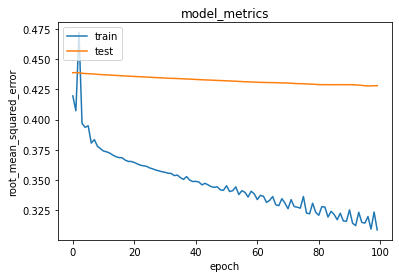

In [60]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Dari hasil plot metrik, dapat diartikan sbb :
* Proses training model untuk data train cukup smooth walaupun pada epoch awal nilai error sempat naik, tapi kemudian menurun secara signifikan hingga nilai error akhir sebesar `0.3985`.
* Sedangkan pada data validadi, nilai error tidak menurun secara signifikan, dan error akhirnya sebesar 0.4281.
* Walaupun nilai error yang didapat cukup baik untuk sistem rekomendasi, namun model ini masih _underfitting_.

### **Mendapatkan Rekomendasi Judul Buku**

Untuk mendapatkan rekomendasi judul buku, pertama kita ambil sampel user secara acak dan definisikan variabel "book_never_read" yang merupakan daftar judul buku yang belum pernah dibaca oleh pengguna.

Variabel **book_never_read** diperoleh dengan menggunakan operator `bitwise (~)` pada variabel **book_read_by_user**.

In [67]:
book_df = ds_new
df = pd.read_csv('/content/book-recommendation-dataset/Ratings.csv')

# rename header kolom
df = df.rename(columns={'User-ID': 'user_id','Book-Rating':'book_rating'})
#ratings.head()
 
# Mengambil sample user
user_id = df.user_id.sample(1).iloc[0]
book_read_by_user = df[df.user_id == user_id]
 
# Operator bitwise (~), bisa diketahui di sini https://docs.python.org/3/reference/expressions.html 
book_never_read = book_df[~book_df['book_ISBN'].isin(book_read_by_user.ISBN.values)]['book_ISBN'] 
book_never_read = list(
    set(book_never_read)
    .intersection(set(isbn_to_isbn_encoded.keys()))
)
 
book_never_read = [[isbn_to_isbn_encoded.get(x)] for x in book_never_read]
user_encoder = user_to_user_encoded.get(user_id)
user_book_array = np.hstack(
    ([[user_encoder]] * len(book_never_read), book_never_read)
)

Selanjutnya, untuk memperoleh rekomendasi judul, gunakan fungsi `model.predict()` dari library Keras dengan menerapkan kode berikut.

In [72]:
ratings = model.predict(user_book_array).flatten()
 
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_book_ids = [
    isbn_encoded_to_isbn.get(book_never_read[x][0]) for x in top_ratings_indices
]
 
print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('Book with high ratings from user')
print('----' * 8)
 
top_book_user = (
    book_read_by_user.sort_values(
        by = 'book_rating',
        ascending=False
    )
    .head(5)
    .ISBN.values
)
 
book_df_rows = book_df[book_df['book_ISBN'].isin(top_book_user)]
for row in book_df_rows.itertuples():
    print(row.title, ':', row.author)
 
print('----' * 8)
print('Top 10 book recommendation')
print('----' * 8)
 
recommended_book = book_df[book_df['book_ISBN'].isin(recommended_book_ids)]
for row in recommended_book.itertuples():
    print(row.title, ':', row.author)

69/69 [==============================] - 0s 1ms/step
Showing recommendations for users: 185384
Book with high ratings from user
--------------------------------
--------------------------------
Top 10 book recommendation
--------------------------------
Seabiscuit : LAURA HILLENBRAND
Bridget Jones's Diary : Helen Fielding
Four Blind Mice : James Patterson
Life of Pi : Yann Martel
Left Behind: A Novel of the Earth's Last Days (Left Behind No. 1) : Tim Lahaye
OLD MAN AND THE SEA : Ernest Hemingway
The Unbearable Lightness of Being : Milan Kundera
Daughter of Fortune : A Novel (Oprah's Book Club (Hardcover)) : Isabel Allende
A Cup of Tea (Ballantine Reader's Circle) : Amy Ephron
Jemima J: A Novel About Ugly Ducklings and Swans : Jane Green


Berhasil!! 
* Melalui ouput di atas sistem telah memberikan rekomendasi 10 judul buku sesuai preferensi pengguna dan yang memiliki rating tertinggi berdasarkan penilaian yang diberikan oleh pengguna. 

## **Kesimpulan**



**1. Content Based Filtering**

Melihat dari hasil rekomendasi yang diberikan, sistem telah memberikan rekomendasi buku berdasarkan kata kunci nama penulis (_author_) dari buku yang pernah dibaca oleh pengguna (_user_). Hal ini dapat diartikan bahwa sistem rekomendasi sudah bisa memberikan rekomendasi sesuai dengan tujuan dari pengembangan sistem, yakni untuk menghasilkan rekomendasi buku berdasarkan nama penulis buku yang pernah dibaca oleh pengguna (_user_).

**2. Collaborative Filtering**

Dari hasil plot metrik, dapat diartikan sbb :
* Proses training model untuk data train cukup smooth walaupun pada epoch awal nilai error sempat naik, tapi kemudian menurun secara signifikan hingga nilai error akhir sebesar `0.3985`.
* Sedangkan pada data validasi, nilai error tidak menurun secara signifikan, dan error akhirnya sebesar 0.4281.
* Walaupun nilai error yang didapat cukup baik untuk sistem rekomendasi, namun model ini masih _underfitting_.

## **Daftar Referensi**

[1] Saleh, Tawakkal. (2014). Pentingnya Membaca dan Menggunakan Perpustakaan Dalam Mengubah Kehidupan Manusia. _JUPITER_. Vol. 13 No.1.

[2] Ilham, Bahrul U. (2022). Harbuknas 2022: Literasi Indonesia Peringkat Ke-62 Dari 70 Negara. Retrieved [16 Oktober 2022] from : [Link](https://bisniskumkm.com/harbuknas-2022-literasi-indonesia-peringkat-ke-62-dari-70-negara/#:~:text=Harbuknas%202022%20%3A%20Literasi%20Indonesia%20Peringkat%20Ke%2D62%20Dari%2070%20negara,-UNESCO%20Menyebut%20indeks)

[3] [Book Recommendation Dataset](https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset) : Collected by Cai-Nicolas Ziegler in a 4-week crawl (August / September 2004) from the Book-Crossing community with kind permission from Ron Hornbaker, CTO of Humankind Systems. Contains 278,858 users (anonymized but with demographic information) providing 1,149,780 ratings (explicit / implicit) about 271,379 books.